In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline
from fredapi import Fred

In [2]:
import pickle

In [4]:
with open('results/LSTM/bin1/Performance_metrices_LSTM_bin_0.pkl', 'rb') as f:
    bin1_data = pickle.load(f)

In [10]:
for i in range(len(bin1_data)):
    print(bin1_data[i])

{'best_trial_value': 0.0427139364263055, 'best_trial_params': {'lstm_units': 128, 'lstm_layers': 1, 'dropout_rate': 0.0, 'learning_rate': 0.007422961980711219, 'batch_size': 16, 'dense_units': 128, 'window_size': 40}, 'mae': 0.031439680606126785, 'r2': 0.9465713500976562}
{'best_trial_value': 0.862690512030841, 'best_trial_params': {'lstm_units': 96, 'lstm_layers': 2, 'dropout_rate': 0.0, 'learning_rate': 0.009937523214526307, 'batch_size': 16, 'dense_units': 32, 'window_size': 60}, 'mae': 0.7675656676292419, 'r2': -0.0868520736694336}
{'best_trial_value': 0.07233504556583287, 'best_trial_params': {'lstm_units': 64, 'lstm_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.0009708545558176705, 'batch_size': 16, 'dense_units': 16, 'window_size': 60}, 'mae': 0.05954863503575325, 'r2': 0.8562239408493042}
{'best_trial_value': 1.2407182845782143, 'best_trial_params': {'lstm_units': 64, 'lstm_layers': 1, 'dropout_rate': 0.0, 'learning_rate': 0.0028145142449226093, 'batch_size': 16, 'dense_u

In [101]:
fred_api_key = 'b0fae0f02614161be351f0a9d3517207'
fred = Fred(api_key=fred_api_key)
start_date = '2020-05-08'
end_date = '2025-05-07'

# List of indicators and their FRED IDs
indicators = {
    "real_GDP": "GDPC1",
    "unemployment_rate": "UNRATE",
    "CPI": "CPIAUCSL",
    "personal_consumption": "PCE",
    "industrial_production": "INDPRO",
    "federal_funds_rate": "FEDFUNDS",
    "10Y_treasury_rate": "DGS10",
    "retail_sales": "RSAFS",
    "housing_starts": "HOUST"
}

data = {}
for name, series_id in indicators.items():
    print(f"Downloading {name}...")
    series_data = fred.get_series(series_id, observation_start=start_date, observation_end=end_date)
    series_data = series_data.to_frame(name=name)
    data[name] = series_data

# Combine into one DataFrame with date index
df_macro = pd.concat(data.values(), axis=1)
df_macro = df_macro.ffill()
df_macro = df_macro[df_macro.index >= '2020-05-08']


df_ticker = pd.read_csv("stock_data.csv" , parse_dates=True)




In [102]:
df_ticker

,timestamp,A,AA,AAA,AAAU,AACB,AACBR,AACBU,AACG,AACT,...,ZURA,ZVIA,ZVOL,ZVRA,ZVSA,ZWS,ZYBT,ZYME,ZYXI,ZZZ
0,2020-05-08 04:00:00+00:00,77.07,7.786,NaN,17.020,NaN,NaN,NaN,0.7499,NaN,...,NaN,NaN,NaN,NaN,NaN,26.58,NaN,35.49,16.390,0.009308
1,2020-05-11 04:00:00+00:00,78.58,7.496,NaN,16.930,NaN,NaN,NaN,0.7560,NaN,...,NaN,NaN,NaN,NaN,NaN,25.92,NaN,34.92,19.230,0.009308
2,2020-05-12 04:00:00+00:00,77.21,7.033,NaN,16.980,NaN,NaN,NaN,0.7100,NaN,...,NaN,NaN,NaN,NaN,NaN,24.33,NaN,34.61,17.450,0.009308
3,2020-05-13 04:00:00+00:00,77.51,6.734,NaN,17.120,NaN,NaN,NaN,0.7599,NaN,...,NaN,NaN,NaN,NaN,NaN,24.16,NaN,35.13,16.300,0.009308
4,2020-05-14 04:00:00+00:00,78.94,6.570,NaN,17.280,NaN,NaN,NaN,0.7204,NaN,...,NaN,NaN,NaN,NaN,NaN,24.98,NaN,36.73,17.310,0.009308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,2025-05-01 04:00:00+00:00,106.46,24.540,24.895,31.895,9.9800,0.2200,10.13,0.9499,11.27,...,1.47,2.35,12.8600,7.64,0.6190,34.43,10.43,12.88,2.010,26.083000
1252,2025-05-02 04:00:00+00:00,108.63,25.530,24.960,31.950,9.9625,0.2400,10.16,0.9899,11.27,...,1.47,2.18,13.2000,8.00,0.6100,34.97,13.48,12.96,2.310,26.480000
1253,2025-05-05 04:00:00+00:00,108.37,25.070,24.930,32.890,9.9900,0.2400,10.16,0.9899,11.26,...,1.44,2.09,13.0600,8.00,0.6021,34.76,12.81,12.85,2.105,26.170000
1254,2025-05-06 04:00:00+00:00,105.24,24.850,24.900,33.820,9.9900,0.2301,10.19,0.9400,11.26,...,1.22,2.02,12.8734,7.40,0.5512,34.28,13.13,11.74,2.030,25.996600


In [103]:
df_macro

,real_GDP,unemployment_rate,CPI,personal_consumption,industrial_production,federal_funds_rate,10Y_treasury_rate,retail_sales,housing_starts
2020-05-08,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.69,478449.0,1039.0
2020-05-11,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.73,478449.0,1039.0
2020-05-12,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.69,478449.0,1039.0
2020-05-13,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.64,478449.0,1039.0
2020-05-14,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.63,478449.0,1039.0
...,...,...,...,...,...,...,...,...,...
2025-05-01,23528.047,4.2,320.321,20669.5,103.8799,4.33,4.25,724131.0,1361.0
2025-05-02,23528.047,4.2,320.321,20669.5,103.8799,4.33,4.33,724131.0,1361.0
2025-05-05,23528.047,4.2,320.321,20669.5,103.8799,4.33,4.36,724131.0,1361.0
2025-05-06,23528.047,4.2,320.321,20669.5,103.8799,4.33,4.30,724131.0,1361.0


In [104]:
df_ticker.set_index('timestamp', inplace=True)
df_ticker.index = pd.to_datetime(df_ticker.index)  # Ensure index is datetime
df_ticker.index = df_ticker.index.date
df_ticker.index = pd.to_datetime(df_ticker.index)  # Convert back to datetime for consistency

In [105]:
df_ticker

,A,AA,AAA,AAAU,AACB,AACBR,AACBU,AACG,AACT,AACT.U,...,ZURA,ZVIA,ZVOL,ZVRA,ZVSA,ZWS,ZYBT,ZYME,ZYXI,ZZZ
2020-05-08,77.07,7.786,NaN,17.020,NaN,NaN,NaN,0.7499,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26.58,NaN,35.49,16.390,0.009308
2020-05-11,78.58,7.496,NaN,16.930,NaN,NaN,NaN,0.7560,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.92,NaN,34.92,19.230,0.009308
2020-05-12,77.21,7.033,NaN,16.980,NaN,NaN,NaN,0.7100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24.33,NaN,34.61,17.450,0.009308
2020-05-13,77.51,6.734,NaN,17.120,NaN,NaN,NaN,0.7599,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24.16,NaN,35.13,16.300,0.009308
2020-05-14,78.94,6.570,NaN,17.280,NaN,NaN,NaN,0.7204,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24.98,NaN,36.73,17.310,0.009308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-01,106.46,24.540,24.895,31.895,9.9800,0.2200,10.13,0.9499,11.27,11.22,...,1.47,2.35,12.8600,7.64,0.6190,34.43,10.43,12.88,2.010,26.083000
2025-05-02,108.63,25.530,24.960,31.950,9.9625,0.2400,10.16,0.9899,11.27,11.22,...,1.47,2.18,13.2000,8.00,0.6100,34.97,13.48,12.96,2.310,26.480000
2025-05-05,108.37,25.070,24.930,32.890,9.9900,0.2400,10.16,0.9899,11.26,11.69,...,1.44,2.09,13.0600,8.00,0.6021,34.76,12.81,12.85,2.105,26.170000
2025-05-06,105.24,24.850,24.900,33.820,9.9900,0.2301,10.19,0.9400,11.26,11.88,...,1.22,2.02,12.8734,7.40,0.5512,34.28,13.13,11.74,2.030,25.996600


In [109]:
df_macro

,real_GDP,unemployment_rate,CPI,personal_consumption,industrial_production,federal_funds_rate,10Y_treasury_rate,retail_sales,housing_starts
2020-05-08,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.69,478449.0,1039.0
2020-05-11,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.73,478449.0,1039.0
2020-05-12,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.69,478449.0,1039.0
2020-05-13,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.64,478449.0,1039.0
2020-05-14,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.63,478449.0,1039.0
...,...,...,...,...,...,...,...,...,...
2025-05-01,23528.047,4.2,320.321,20669.5,103.8799,4.33,4.25,724131.0,1361.0
2025-05-02,23528.047,4.2,320.321,20669.5,103.8799,4.33,4.33,724131.0,1361.0
2025-05-05,23528.047,4.2,320.321,20669.5,103.8799,4.33,4.36,724131.0,1361.0
2025-05-06,23528.047,4.2,320.321,20669.5,103.8799,4.33,4.30,724131.0,1361.0


In [110]:
df_macro.to_csv("macro_data.csv", index=True)

In [111]:
df_macro = pd.read_csv("macro_data.csv", index_col=0, parse_dates=True)

In [112]:
df_macro

,real_GDP,unemployment_rate,CPI,personal_consumption,industrial_production,federal_funds_rate,10Y_treasury_rate,retail_sales,housing_starts
2020-05-08,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.69,478449.0,1039.0
2020-05-11,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.73,478449.0,1039.0
2020-05-12,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.69,478449.0,1039.0
2020-05-13,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.64,478449.0,1039.0
2020-05-14,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.63,478449.0,1039.0
...,...,...,...,...,...,...,...,...,...
2025-05-01,23528.047,4.2,320.321,20669.5,103.8799,4.33,4.25,724131.0,1361.0
2025-05-02,23528.047,4.2,320.321,20669.5,103.8799,4.33,4.33,724131.0,1361.0
2025-05-05,23528.047,4.2,320.321,20669.5,103.8799,4.33,4.36,724131.0,1361.0
2025-05-06,23528.047,4.2,320.321,20669.5,103.8799,4.33,4.30,724131.0,1361.0


In [107]:
# Merge on 'date' column
df_combined = df_ticker.join(df_macro, how='left')

In [113]:
df_full = pd.read_csv("stock_data_full_data.csv", index_col=0, parse_dates=True)

In [126]:
df_sp500 = df_full[df_full['symbol'] == 'SPY'].copy()
df_sp500

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2020-05-08 04:00:00+00:00,271.87,272.2800,269.41,384326,270.55,77453400,271.020000,SPY
2020-05-11 04:00:00+00:00,271.98,273.2600,269.43,419262,269.86,80185487,271.660000,SPY
2020-05-12 04:00:00+00:00,266.33,273.4800,266.31,473670,273.06,96646578,270.030000,SPY
2020-05-13 04:00:00+00:00,261.63,266.9300,259.28,833465,265.88,145925811,262.390000,SPY
2020-05-14 04:00:00+00:00,264.93,264.9900,253.73,751987,259.27,122811653,261.040000,SPY
...,...,...,...,...,...,...,...,...
2025-05-01 04:00:00+00:00,558.47,564.0699,557.86,585865,560.37,63186146,561.004467,SPY
2025-05-02 04:00:00+00:00,566.76,568.3800,562.38,571476,564.73,60717270,566.424958,SPY
2025-05-05 04:00:00+00:00,563.51,566.6500,561.70,414698,562.57,38659222,564.409762,SPY


In [108]:
df_combined

,A,AA,AAA,AAAU,AACB,AACBR,AACBU,AACG,AACT,AACT.U,...,ZZZ,real_GDP,unemployment_rate,CPI,personal_consumption,industrial_production,federal_funds_rate,10Y_treasury_rate,retail_sales,housing_starts
2020-05-08,77.07,7.786,NaN,17.020,NaN,NaN,NaN,0.7499,NaN,NaN,...,0.009308,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.69,478449.0,1039.0
2020-05-11,78.58,7.496,NaN,16.930,NaN,NaN,NaN,0.7560,NaN,NaN,...,0.009308,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.73,478449.0,1039.0
2020-05-12,77.21,7.033,NaN,16.980,NaN,NaN,NaN,0.7100,NaN,NaN,...,0.009308,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.69,478449.0,1039.0
2020-05-13,77.51,6.734,NaN,17.120,NaN,NaN,NaN,0.7599,NaN,NaN,...,0.009308,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.64,478449.0,1039.0
2020-05-14,78.94,6.570,NaN,17.280,NaN,NaN,NaN,0.7204,NaN,NaN,...,0.009308,19056.617,13.2,255.802,13251.7,86.0108,0.05,0.63,478449.0,1039.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-01,106.46,24.540,24.895,31.895,9.9800,0.2200,10.13,0.9499,11.27,11.22,...,26.083000,23528.047,4.2,320.321,20669.5,103.8799,4.33,4.25,724131.0,1361.0
2025-05-02,108.63,25.530,24.960,31.950,9.9625,0.2400,10.16,0.9899,11.27,11.22,...,26.480000,23528.047,4.2,320.321,20669.5,103.8799,4.33,4.33,724131.0,1361.0
2025-05-05,108.37,25.070,24.930,32.890,9.9900,0.2400,10.16,0.9899,11.26,11.69,...,26.170000,23528.047,4.2,320.321,20669.5,103.8799,4.33,4.36,724131.0,1361.0
2025-05-06,105.24,24.850,24.900,33.820,9.9900,0.2301,10.19,0.9400,11.26,11.88,...,25.996600,23528.047,4.2,320.321,20669.5,103.8799,4.33,4.30,724131.0,1361.0


In [93]:
print(df_ticker.index.dtype)
print(df_macro.index.dtype)

datetime64[ns]
datetime64[ns]


In [94]:
print(df_ticker.head())
print(df_macro.head())

                A     AA  AAA   AAAU  AACB  AACBR  AACBU    AACG  AACT  \
2020-05-08  77.07  7.786  NaN  17.02   NaN    NaN    NaN  0.7499   NaN   
2020-05-11  78.58  7.496  NaN  16.93   NaN    NaN    NaN  0.7560   NaN   
2020-05-12  77.21  7.033  NaN  16.98   NaN    NaN    NaN  0.7100   NaN   
2020-05-13  77.51  6.734  NaN  17.12   NaN    NaN    NaN  0.7599   NaN   
2020-05-14  78.94  6.570  NaN  17.28   NaN    NaN    NaN  0.7204   NaN   

            AACT.U  ...  ZURA  ZVIA  ZVOL  ZVRA  ZVSA    ZWS  ZYBT   ZYME  \
2020-05-08     NaN  ...   NaN   NaN   NaN   NaN   NaN  26.58   NaN  35.49   
2020-05-11     NaN  ...   NaN   NaN   NaN   NaN   NaN  25.92   NaN  34.92   
2020-05-12     NaN  ...   NaN   NaN   NaN   NaN   NaN  24.33   NaN  34.61   
2020-05-13     NaN  ...   NaN   NaN   NaN   NaN   NaN  24.16   NaN  35.13   
2020-05-14     NaN  ...   NaN   NaN   NaN   NaN   NaN  24.98   NaN  36.73   

             ZYXI       ZZZ  
2020-05-08  16.39  0.009308  
2020-05-11  19.23  0.009308  
20

In [47]:
df_macro.index = pd.to_datetime(df_macro.index) 

In [48]:
df_macro.index.dtype

dtype('<M8[ns]')

In [49]:
df_ticker.index.dtype

dtype('<M8[ns]')

In [41]:
df_macro_aligned.shape

(0, 10)

In [22]:
df_macro.shape

(1320, 9)

In [23]:
df_ff = pd.read_csv("stock_data.csv", index_col=0, parse_dates=True)

In [24]:
df_ff.shape

(1256, 11274)

In [32]:
# Ensure both indices are datetime
df_macro.index

DatetimeIndex(['2020-05-08', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-18', '2020-05-19',
               '2020-05-20', '2020-05-21',
               ...
               '2025-04-24', '2025-04-25', '2025-04-28', '2025-04-29',
               '2025-04-30', '2025-05-01', '2025-05-02', '2025-05-05',
               '2025-05-06', '2025-05-07'],
              dtype='datetime64[ns]', length=1320, freq=None)

In [33]:
df_ff.index

DatetimeIndex(['2020-05-08 04:00:00+00:00', '2020-05-11 04:00:00+00:00',
               '2020-05-12 04:00:00+00:00', '2020-05-13 04:00:00+00:00',
               '2020-05-14 04:00:00+00:00', '2020-05-15 04:00:00+00:00',
               '2020-05-18 04:00:00+00:00', '2020-05-19 04:00:00+00:00',
               '2020-05-20 04:00:00+00:00', '2020-05-21 04:00:00+00:00',
               ...
               '2025-04-24 04:00:00+00:00', '2025-04-25 04:00:00+00:00',
               '2025-04-28 04:00:00+00:00', '2025-04-29 04:00:00+00:00',
               '2025-04-30 04:00:00+00:00', '2025-05-01 04:00:00+00:00',
               '2025-05-02 04:00:00+00:00', '2025-05-05 04:00:00+00:00',
               '2025-05-06 04:00:00+00:00', '2025-05-07 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='timestamp', length=1256, freq=None)

In [36]:
df_ff.shape

(1256, 11274)

In [37]:
df_macro_aligned.shape

(1256, 9)

In [1]:
API_KEY = 'PKBYDKFT1P9C7J74JPV2'
API_SECRET = 'c56K2qegiEUAgm5JgbwZGISdr9lDe9cN05kpaHmF'
BASE_URL = 'https://paper-api.alpaca.markets'

In [29]:
# Initialize Alpaca API
import alpaca_trade_api as tradeapi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

api = tradeapi.REST(API_KEY, API_SECRET, BASE_URL, api_version = 'v2')

In [4]:
start_date = '2018-01-01'
end_date = '2023-12-31'

symbol = 'NVDA'
timeframe = tradeapi.TimeFrame.Day

In [5]:
start_date_test = '2024-01-01'
end_date_test = '2024-02-01'

In [10]:
df = api.get_bars(symbol, timeframe, start = start_date, end = end_date).df
df = df.reset_index()
df['date'] = pd.to_datetime(df['timestamp']).dt.date

In [11]:
df_test = api.get_bars(symbol, timeframe, start = start_date_test, end = end_date_test).df
df_test = df_test.reset_index()
df_test['date'] = pd.to_datetime(df['timestamp']).dt.date

In [12]:
df = df[['open', 'date']]

In [13]:
df_test = df_test[['open', 'date']]
actual_stock_price = df_test[['open']]

In [14]:
df.set_index('date', inplace=True)
training_set = df
training_set.shape

(1509, 1)

In [15]:
df_test.set_index('date', inplace=True)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)

In [19]:
X_train = []
y_train = []
for i in range (60, training_set.shape[0]):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [20]:
print(X_train.shape)
print(y_train.shape)

(1449, 60)
(1449,)


In [21]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1], 1))
X_train.shape

(1449, 60, 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [23]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

c:\Users\jerem\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=70, batch_size=32)

Epoch 1/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - loss: 0.0325
Epoch 2/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.0116
Epoch 3/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - loss: 0.0082
Epoch 4/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0066
Epoch 5/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0058
Epoch 6/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0058
Epoch 7/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0042
Epoch 8/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0039
Epoch 9/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0048
Epoch 10/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0035
Epoch 11/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0030
Epoch 12/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0037
Epoch 13/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0040
Epoch 14/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0036
Epoch 15/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0028
Ep

In [25]:
dataset_total = pd.concat((df, df_test), axis=0)
inputs = dataset_total[len(dataset_total)-len(df_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test)

[[[0.45662107]
  [0.45859503]
  [0.4675538 ]
  ...
  [0.53200447]
  [0.53382659]
  [0.53617327]]

 [[0.45859503]
  [0.4675538 ]
  [0.47401405]
  ...
  [0.53382659]
  [0.53617327]
  [0.52831882]]

 [[0.4675538 ]
  [0.47401405]
  [0.48624436]
  ...
  [0.53617327]
  [0.52831882]
  [0.50403766]]

 ...

 [[0.41571995]
  [0.40692683]
  [0.41291774]
  ...
  [0.67085847]
  [0.68099057]
  [0.70923347]]

 [[0.40692683]
  [0.41291774]
  [0.44665461]
  ...
  [0.68099057]
  [0.70923347]
  [0.69004597]]

 [[0.41291774]
  [0.44665461]
  [0.45620695]
  ...
  [0.70923347]
  [0.69004597]
  [0.69380064]]]


c:\Users\jerem\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [26]:
X_test.shape

(20, 60, 1)

In [27]:
print(X_test.shape)
predicted_stock_prices = regressor.predict(X_test)
print(predicted_stock_prices.shape)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)

(20, 60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step
(20, 1)


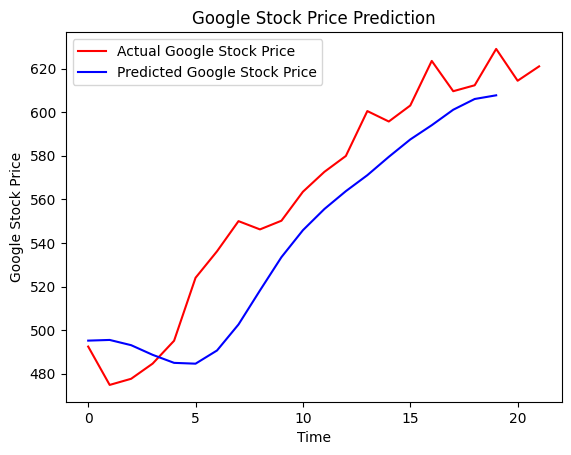

In [30]:
plt.plot(actual_stock_price, color='red', label='Actual Google Stock Price')
plt.plot(predicted_stock_prices, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()